# Convolutions

In [ ]:
import deeplake
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
from torch import tensor
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib.pyplot import plot as plt
from torch import optim

mpl.rcParams['image.cmap'] = 'gray'

from miniai.datasets import *
from miniai.training import *

/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.8.15) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [ ]:
bs = 32
ds = deeplake.load('hub://activeloop/not-mnist-small')
x, y = 'images', 'labels'
images, labels = ds.tensors[x].numpy().astype('float32'), ds.tensors[y].numpy().astype('long')
images, valid = map(tensor, (images, labels))
x_train, x_valid, y_train, y_valid = train_test_split(images, labels, random_state=42, test_size=0.2, stratify=labels)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

\

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/not-mnist-small



hub://activeloop/not-mnist-small loaded successfully.



\

(torch.Size([14979, 28, 28]),
 torch.Size([3745, 28, 28]),
 (14979, 1),
 (3745, 1))

<AxesSubplot: >

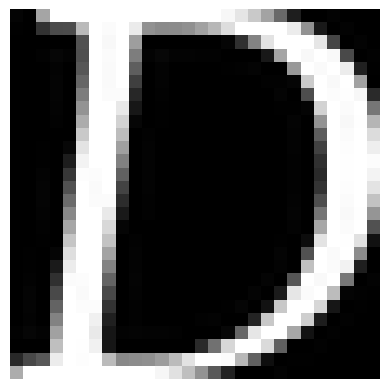

In [ ]:
img = x_train[0]
show_image(img)

## kernel

In [ ]:
top_edge = tensor([[-1, -1, -1], 
                   [0, 0, 0],
                   [1, 1, 1]
                  ])

<AxesSubplot: >

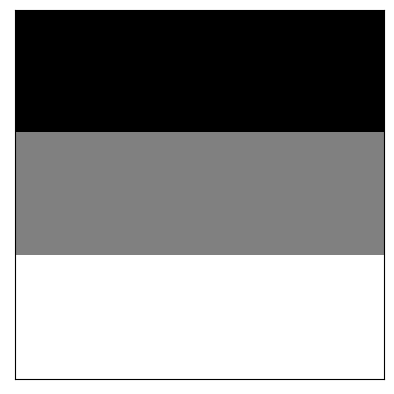

In [ ]:
show_image(top_edge, noframe=False)

In [ ]:
df = pd.DataFrame(data = img); df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,4.0,0.0,165.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,201.0,163.0,106.0,30.0,0.0,0.0,3.0,0.0,0.0,0.0
1,1.0,0.0,50.0,75.0,76.0,186.0,255.0,251.0,255.0,235.0,...,255.0,255.0,255.0,236.0,146.0,25.0,0.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,81.0,255.0,248.0,255.0,158.0,...,132.0,228.0,255.0,255.0,255.0,230.0,69.0,0.0,3.0,0.0
3,0.0,0.0,2.0,6.0,3.0,79.0,255.0,251.0,255.0,125.0,...,0.0,24.0,165.0,255.0,248.0,255.0,249.0,73.0,0.0,2.0
4,0.0,0.0,0.0,3.0,0.0,87.0,255.0,250.0,255.0,94.0,...,4.0,0.0,0.0,153.0,255.0,250.0,255.0,236.0,33.0,1.0
5,0.0,0.0,0.0,4.0,0.0,102.0,255.0,250.0,255.0,63.0,...,0.0,2.0,2.0,5.0,203.0,255.0,249.0,255.0,162.0,0.0
6,0.0,0.0,0.0,4.0,0.0,125.0,255.0,251.0,251.0,39.0,...,0.0,0.0,4.0,0.0,77.0,255.0,252.0,254.0,247.0,42.0
7,0.0,0.0,0.0,3.0,0.0,147.0,255.0,255.0,232.0,23.0,...,0.0,0.0,1.0,1.0,4.0,210.0,255.0,251.0,255.0,118.0
8,0.0,0.0,0.0,2.0,0.0,172.0,255.0,255.0,210.0,6.0,...,0.0,0.0,0.0,4.0,0.0,147.0,255.0,248.0,254.0,181.0
9,0.0,0.0,0.0,0.0,0.0,201.0,255.0,255.0,189.0,0.0,...,0.0,0.0,0.0,3.0,0.0,93.0,255.0,251.0,255.0,220.0


In [ ]:
img_section = img[0: 3, 17: 20]; img_section

tensor([[229., 201., 163.],
        [255., 255., 255.],
        [ 49., 132., 228.]])

In [ ]:
(img_section * top_edge).sum()

tensor(-184.)

In [ ]:
img_section = img[19: 22, 17: 20]; img_section

tensor([[0., 0., 0.],
        [0., 0., 4.],
        [0., 4., 0.]])

In [ ]:
(img_section * top_edge).sum()

tensor(4.)

In [ ]:
[[(i, j) for j in range(5)] for i in range(5)]

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]]

In [ ]:
def apply_kernel(row, col, kernel): return (img[row-1: row+2, col-1: col+ 2] * kernel).sum()

<AxesSubplot: >

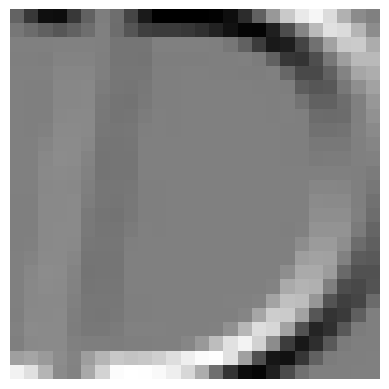

In [ ]:
img3 = tensor([[apply_kernel(i, j, top_edge) for j in range(1, 27)] for i in range(1, 27)])
show_image(img3)

In [ ]:
left_edge = tensor([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

<AxesSubplot: >

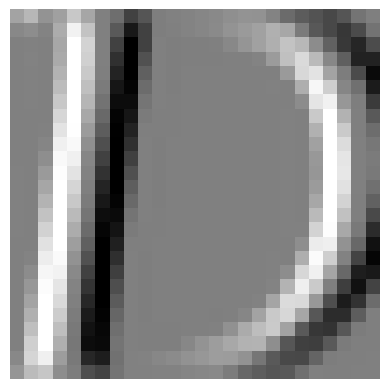

In [ ]:
img4 = tensor([[apply_kernel(i, j, left_edge) for j in range(1, 27)] for i in range(1, 27)])
show_image(img4)

In [ ]:
img4.shape, img3.shape

(torch.Size([26, 26]), torch.Size([26, 26]))

## im2col

In [ ]:
img_batch = img[None, None]; img_batch.shape

torch.Size([1, 1, 28, 28])

In [ ]:
img_unfold = F.unfold(img_batch, (3, 3))[0]

In [ ]:
w = top_edge.view(-1).float(); w.shape

torch.Size([9])

In [ ]:
out = (w @ img_unfold)

<AxesSubplot: >

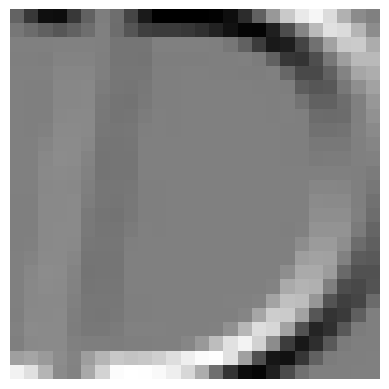

In [ ]:
show_image(out.view(26, 26))


## conv2d

In [ ]:
out = F.conv2d(img[None, None], top_edge[None, None].float()); 

<AxesSubplot: >

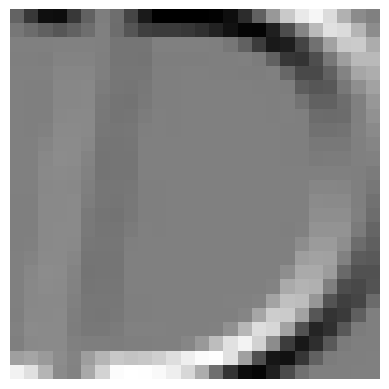

In [ ]:
show_image(out[0][0])

In [ ]:
%timeit -n 10 tensor([[apply_kernel(i, j, top_edge) for j in range(1, 27)] for i in range(1, 27)])

13.1 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 (w @ F.unfold(img[None, None], (3, 3))[0]).view(26, 26)

The slowest run took 4.25 times longer than the fastest. This could mean that an intermediate result is being cached.
95.7 µs ± 52.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 (F.conv2d(img[None, None], top_edge[None, None].float()))

39.5 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## applying various kernels

In [ ]:
diag_edge = torch.tensor([
    [0, -1, -1],
    [1, 0, -1],
    [1, 1,  0]
])

<AxesSubplot: >

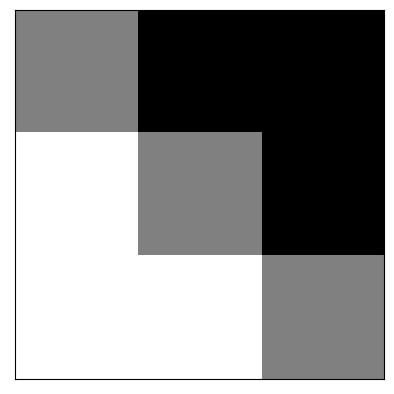

In [ ]:
show_image(diag_edge, noframe=False)

In [ ]:
diag_edge2 = torch.tensor([
    [-1, -1, 0],
    [-1, 0, 1],
    [0, 1, 1]
    ])

<AxesSubplot: >

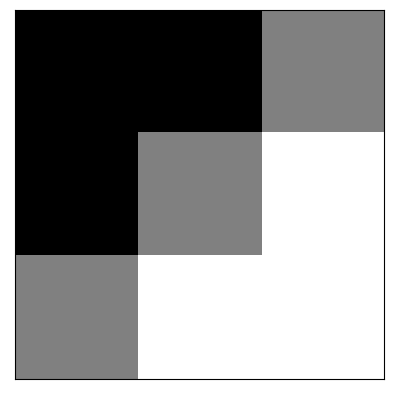

In [ ]:
show_image(diag_edge2, noframe=False)

In [ ]:
img_batch = x_train[:bs][:, None]; img_batch.shape

torch.Size([32, 1, 28, 28])

In [ ]:
weight = torch.stack([top_edge, left_edge, diag_edge, diag_edge2])[:, None].float(); weight.shape

torch.Size([4, 1, 3, 3])

In [ ]:
out = F.conv2d(img_batch, weight); out.shape

torch.Size([32, 4, 26, 26])

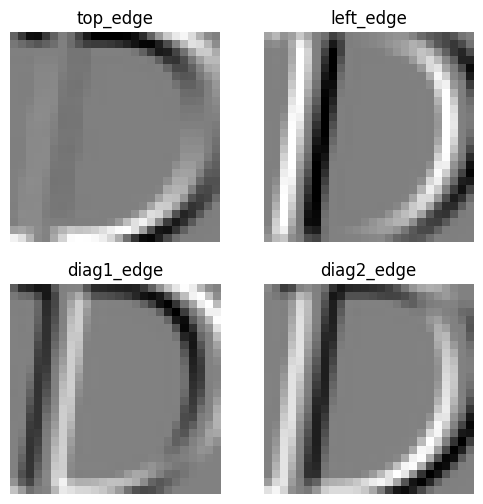

In [ ]:
show_images(out[0], titles=['top_edge', 'left_edge', 'diag1_edge', 'diag2_edge'])

In [ ]:
ks = 3

In [ ]:
def conv(nif, nof, ks, stride, act=True):
    l = nn.Sequential(
        nn.Conv2d(nif, nof, ks, stride=stride, padding=ks//2)
    )
    if act: l.append(nn.ReLU())
    return l

In [ ]:
broken_cnn = nn.Sequential(
    conv(1, 30, ks, 1),
    conv(30, 10, ks, 1, act=False)
)

In [ ]:
xb = x_train[:bs][:, None]
broken_cnn(xb).shape

torch.Size([32, 10, 28, 28])

In [ ]:
simple_cnn = nn.Sequential(
    conv(1, 2, ks, stride=2), # 14 x 14
    conv(2, 4, ks, stride=2), # 7 x 7
    conv(4, 6, ks, stride=2), # 4 x 4
    conv(6, 8, ks, stride=2),  # 2 x 2
    conv(8, 10, ks, stride=2, act=False), # 1 x 1
    nn.Flatten()
)

In [ ]:
simple_cnn(xb).shape

torch.Size([32, 10])

In [ ]:
simple_cnn

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (1): Sequential(
    (0): Conv2d(2, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (2): Sequential(
    (0): Conv2d(4, 6, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (3): Sequential(
    (0): Conv2d(6, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
  )
  (4): Sequential(
    (0): Conv2d(8, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (5): Flatten(start_dim=1, end_dim=-1)
)

In [ ]:
x_train = x_train[:, None]
x_valid = x_valid[:, None]
y_train = y_train.squeeze(-1)
y_valid = y_valid.squeeze(-1)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

(torch.Size([14979, 1, 28, 28]),
 torch.Size([3745, 1, 28, 28]),
 (14979,),
 (3745,))

In [ ]:
train_ds = Dataset(x_train, y_train)
valid_ds = Dataset(x_valid, y_valid)

In [ ]:
x, y = next(iter(train_ds))
x.shape, y.shape

(torch.Size([1, 28, 28]), ())

In [ ]:
train_dl, valid_dl = get_dls(train_ds, valid_ds, bs)

In [ ]:
xb, yb = next(iter(train_dl))
xb.shape, yb.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
F.cross_entropy(simple_cnn(xb), yb.long())

tensor(2.3248, grad_fn=<NllLossBackward0>)

In [ ]:
opt_func = optim.SGD(simple_cnn.parameters(), lr=1e-2)

In [ ]:
fit(10, simple_cnn, F.cross_entropy, opt_func, train_dl, valid_dl)

0 0.6451902322680036 0.8277703604647251
1 0.4565926138565283 0.8825100136057875
2 0.3933551796566501 0.8878504675284565
3 0.4282842855030131 0.8790387182751389
4 0.37521815547478377 0.8934579441639705
5 0.5425982062822986 0.8098798397386344
6 0.4697545800333189 0.8477970627185022
7 0.3570987345260358 0.8985313751509734
8 0.3321835146766798 0.9044058744834167
9 0.34420169659147914 0.8998664886356196


(0.34420169659147914, 0.8998664886356196)